In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']


tss_annotation = doc['tss_annotation']


import os
import sys
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
mpl.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename


#mpl.use('nbagg')
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


In [2]:
import plot_tss_results

## peak bins -1kb:+1kb, no introns

In [3]:
savedir = "Results/Figures/12032019/Figure2"
if not os.path.exists(savedir):
    os.makedirs(savedir)

<BarContainer object of 15 artists>
('Total number', 21387)
[('BMDMwt', 8513.0), ('Heart', 10567.0), ('FemaleReproductive', 11814.0), ('Spleen', 10909.0), ('CHO', 9853.0), ('BMDM1hKLA', 8103.0), ('Brain', 13017.0), ('Lung', 11947.0), ('Liver', 10148.0), ('MiscOrgans', 11937.0), ('Muscle', 11423.0), ('Kidney', 11559.0), ('Pancreas', 9787.0), ('Total unique genes', 15317.0), ('Not in CHO', 5464.0)]
[('BMDMwt', 0.3980455416842007), ('Heart', 0.4940851919390284), ('FemaleReproductive', 0.5523916397811754), ('Spleen', 0.510076214522841), ('CHO', 0.46070042549212137), ('BMDM1hKLA', 0.378875017534016), ('Brain', 0.608640763080376), ('Lung', 0.5586103707859915), ('Liver', 0.4744938514050592), ('MiscOrgans', 0.5581427970262309), ('Muscle', 0.534109505774536), ('Kidney', 0.5404685089072802), ('Pancreas', 0.4576144386777014), ('Total unique genes', 0.7161827278253144), ('Not in CHO', 0.2554823023331931)]
[('BMDMwt', 58.00000000000001), ('Heart', 38.0), ('FemaleReproductive', 63.00000000000001), (

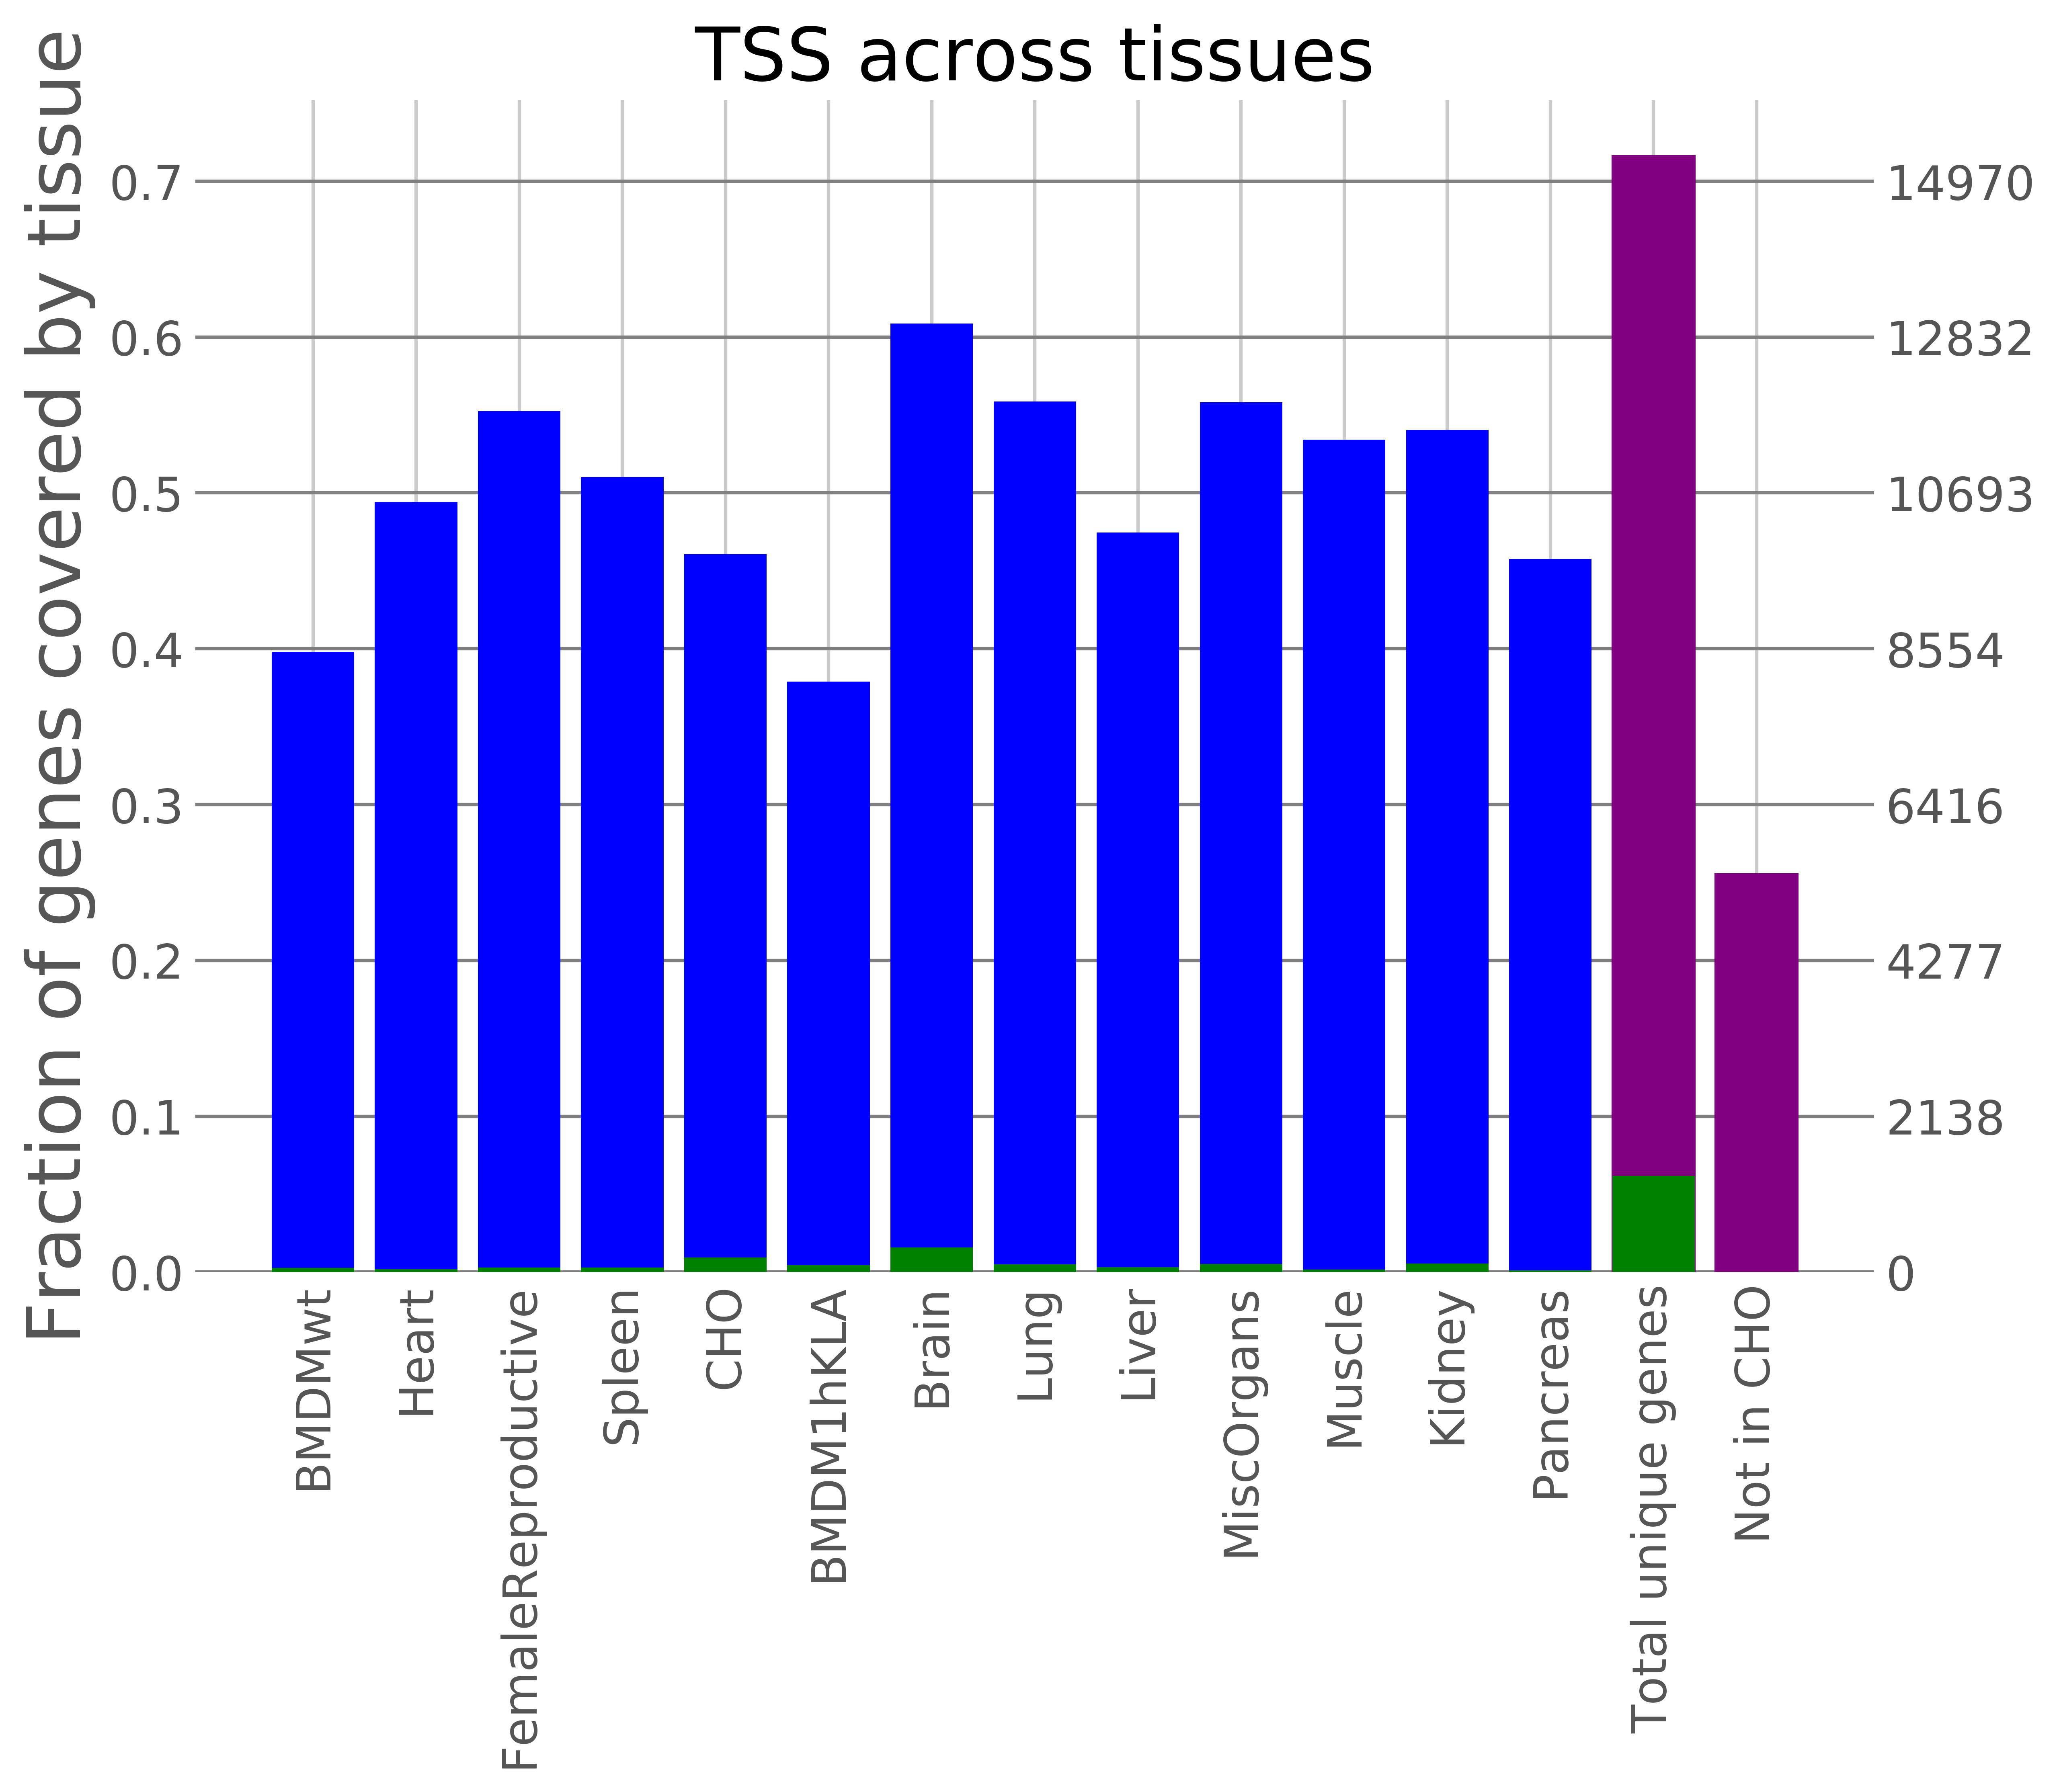

In [4]:
landmark_name='genes'
f_in = 'Results/tss_annotation/gene_df_02_tissues.p' 
df = pickle.load(open(f_in,'rb'))
f_save = os.path.join(savedir,'gene_df_02_tissues_frac_unique.png')
plot_tss_results.tmp_plot_tss_across_tissues_plus_unique(df, tissues, landmark_name,
                                f_save=f_save, tissue_list='Tissues',
                                        is_unique=True,not_in_cho=True)

<BarContainer object of 15 artists>
('Total number', 35679)
[('BMDMwt', 9589.0), ('Heart', 11803.0), ('FemaleReproductive', 13504.0), ('Spleen', 12330.0), ('CHO', 11792.0), ('BMDM1hKLA', 9117.0), ('Brain', 15388.0), ('Lung', 14047.000000000002), ('Liver', 11430.0), ('MiscOrgans', 13506.0), ('Muscle', 12984.0), ('Kidney', 13432.0), ('Pancreas', 10583.0), ('Total unique genes', 20637.0), ('Not in CHO', 8845.0)]
[('BMDMwt', 0.26875753244205275), ('Heart', 0.33081084111101766), ('FemaleReproductive', 0.3784859441127834), ('Spleen', 0.34558143445724376), ('CHO', 0.330502536506068), ('BMDM1hKLA', 0.2555284621205751), ('Brain', 0.43129011463325767), ('Lung', 0.39370498052075453), ('Liver', 0.3203565122340873), ('MiscOrgans', 0.37854199949550155), ('Muscle', 0.3639115446060708), ('Kidney', 0.3764679503349309), ('Pancreas', 0.29661705765296115), ('Total unique genes', 0.5784074665769781), ('Not in CHO', 0.24790493007091005)]
[('BMDMwt', 252.0), ('Heart', 130.0), ('FemaleReproductive', 128.0), (

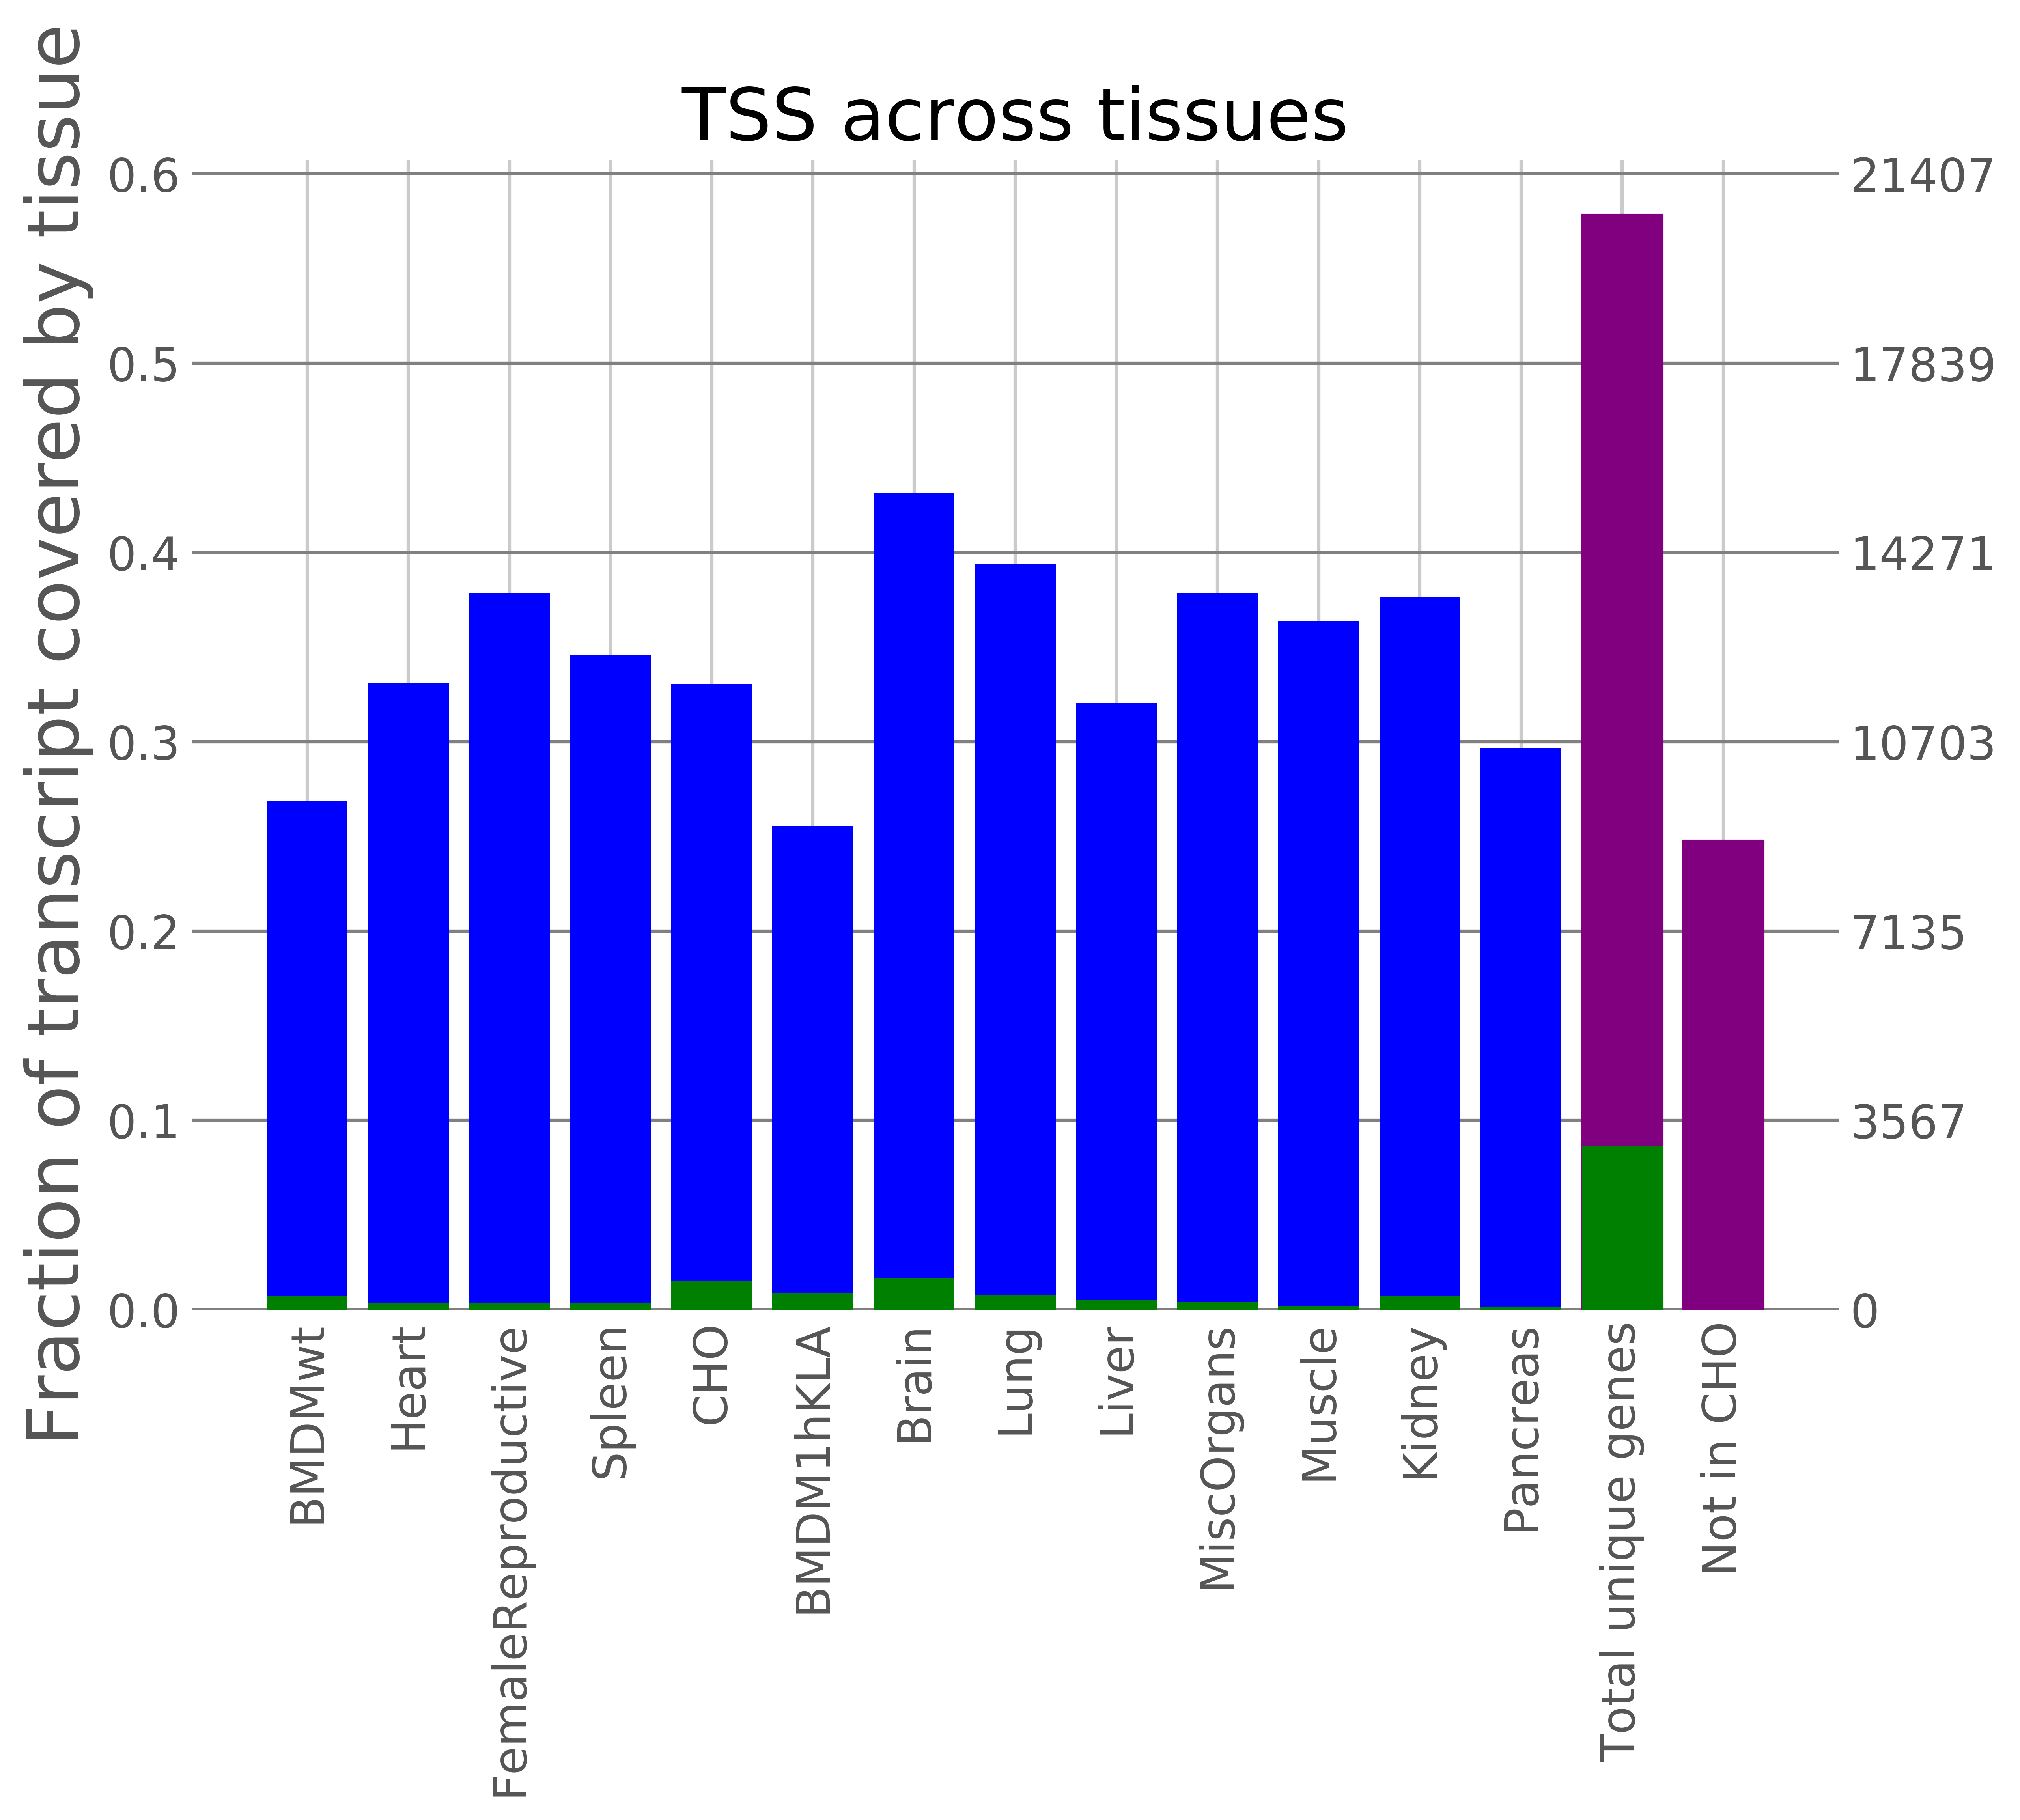

In [5]:
f_in = 'Results/tss_annotation/txn_df_02_tissues.p' 
df = pickle.load(open(f_in,'rb'))
landmark_name='transcript'

f_save = os.path.join(savedir,'txn_df_02_tissues_frac_unique.png')
plot_tss_results.tmp_plot_tss_across_tissues_plus_unique(df, tissues, landmark_name,
                                f_save=f_save, tissue_list='Tissues',
                                        is_unique=True,not_in_cho=True)